## Install necessary libraries

In [ ]:
#installer

## Importing libraries


In [ ]:
import pandas as pd # Import the Pandas library
from google.colab import drive # Import the drive module from the google.colab library
drive.mount('/content/drive') # Mount a Google drive folder into the /content/drive folder in the system

# Read the CSV file located in the Google Drive folder and load its contents into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/ITC508_data/data_supervised.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Article,Category
0,"MANILA, Philippines - ï¿½Bad morningï¿½ ang su...",Metro
1,Kabilang sa mga bagong panuntunan saï¿½ Operat...,Bansa
2,IBINULONG nang mga asset ng mga kuwago ng ORA ...,Opinyon
3,"MANILA, Philippines - Dalawa ang iniulat na na...",Metro
4,"Biruin mo, nagamit pa rin niï¿½Angelika dela C...",Showbiz


# Pipeline
# ----------------------------------------------
## 1. Lowercasing
## 2. Special Character Removal
## 3. Stopword Removal
## 4. Tokenization

# ---------------------------------------------------

# Lowercasing Dataset

In [ ]:
test_case = df['Article'][0] # Get First row in the DataFrame
print(test_case)

MANILA, Philippines - ï¿½Bad morningï¿½ ang sumalubong sa libu-libong pasahero ng Metro Rail Transit (MRT-3) kahapon ng umaga makaraang pababain ng tren dahil sa dalawang beses na aberya sa biyahe.
Nabatid na pinababa ang mga pasahero ng isang tren sa bahagi ng Santolan Station southbound, dakong alas-5:30 ng umaga matapos bumaba ang boltahe ng kuryente.
Ayon sa MRT-3, kinakailaï¿½ngang pababain ang mga pasahero at itigil ang operasyon dahil magiging delikado ang pagpapatakbo ng tren at makakaapekto sa preno nito.
Ayon kay MRT-3 General Manager Ramon Buenafe, depektibong pintuan naman ang dahilan nang pansamantaï¿½lang pagtigil ng southbound trip ng MRT-3 sa GMA-Kamuning Station, pagitan ng Cubao station, dakong alas-7:00 ng umaga.
Nabatid na ito na ang ikatlong sunod na araw ngayong Linggo na naperwisyo ng aberya ang mga pasahero ng MRT-3.
Matatandaan nitong Miyerkules lamang ay tumirik ang isang northbound na tren ng MRT sa Shaw Boulevard station, tumirik din ang isang tren sa pagita

In [ ]:
test_case = test_case.lower() # Transform the test case into its lowercased counterpart
print(test_case)

manila, philippines - ï¿½bad morningï¿½ ang sumalubong sa libu-libong pasahero ng metro rail transit (mrt-3) kahapon ng umaga makaraang pababain ng tren dahil sa dalawang beses na aberya sa biyahe.
nabatid na pinababa ang mga pasahero ng isang tren sa bahagi ng santolan station southbound, dakong alas-5:30 ng umaga matapos bumaba ang boltahe ng kuryente.
ayon sa mrt-3, kinakailaï¿½ngang pababain ang mga pasahero at itigil ang operasyon dahil magiging delikado ang pagpapatakbo ng tren at makakaapekto sa preno nito.
ayon kay mrt-3 general manager ramon buenafe, depektibong pintuan naman ang dahilan nang pansamantaï¿½lang pagtigil ng southbound trip ng mrt-3 sa gma-kamuning station, pagitan ng cubao station, dakong alas-7:00 ng umaga.
nabatid na ito na ang ikatlong sunod na araw ngayong linggo na naperwisyo ng aberya ang mga pasahero ng mrt-3.
matatandaan nitong miyerkules lamang ay tumirik ang isang northbound na tren ng mrt sa shaw boulevard station, tumirik din ang isang tren sa pagita

In [ ]:
df['Article'] = df['Article'].apply(lambda x: str(x).lower()) # Apply lowercasing to the whole dataset using apply() and a lambda function
df.head(10)

,Article,Category
0,"manila, philippines - ï¿½bad morningï¿½ ang su...",Metro
1,kabilang sa mga bagong panuntunan saï¿½ operat...,Bansa
2,ibinulong nang mga asset ng mga kuwago ng ora ...,Opinyon
3,"manila, philippines - dalawa ang iniulat na na...",Metro
4,"biruin mo, nagamit pa rin niï¿½angelika dela c...",Showbiz
5,"philstar.com/file\r\nmanila, philippines ï¿½ m...",Metro
6,"manila, philippines - ipinalalagay na ang tabr...",Palaro
7,inangatan ni marcio lassiter ng san miguel sin...,Palaro
8,pik: balik-recording si willie revillame dahil...,Showbiz
9,"manila, philippines ï¿½ naniniwala pa rin ang ...",Bansa


# Special Character Removal

In [ ]:
print(test_case)

manila, philippines - ï¿½bad morningï¿½ ang sumalubong sa libu-libong pasahero ng metro rail transit (mrt-3) kahapon ng umaga makaraang pababain ng tren dahil sa dalawang beses na aberya sa biyahe.
nabatid na pinababa ang mga pasahero ng isang tren sa bahagi ng santolan station southbound, dakong alas-5:30 ng umaga matapos bumaba ang boltahe ng kuryente.
ayon sa mrt-3, kinakailaï¿½ngang pababain ang mga pasahero at itigil ang operasyon dahil magiging delikado ang pagpapatakbo ng tren at makakaapekto sa preno nito.
ayon kay mrt-3 general manager ramon buenafe, depektibong pintuan naman ang dahilan nang pansamantaï¿½lang pagtigil ng southbound trip ng mrt-3 sa gma-kamuning station, pagitan ng cubao station, dakong alas-7:00 ng umaga.
nabatid na ito na ang ikatlong sunod na araw ngayong linggo na naperwisyo ng aberya ang mga pasahero ng mrt-3.
matatandaan nitong miyerkules lamang ay tumirik ang isang northbound na tren ng mrt sa shaw boulevard station, tumirik din ang isang tren sa pagita

In [ ]:
import re # Import the Regular Expression (RegEx) Python Library
test_case = re.sub("[^a-zA-Z0-9\s]",'',test_case) # remove non-alphanumeric and whitespace characters from the test case
print(test_case)

manila philippines  bad morning ang sumalubong sa libulibong pasahero ng metro rail transit mrt3 kahapon ng umaga makaraang pababain ng tren dahil sa dalawang beses na aberya sa biyahe
nabatid na pinababa ang mga pasahero ng isang tren sa bahagi ng santolan station southbound dakong alas530 ng umaga matapos bumaba ang boltahe ng kuryente
ayon sa mrt3 kinakailangang pababain ang mga pasahero at itigil ang operasyon dahil magiging delikado ang pagpapatakbo ng tren at makakaapekto sa preno nito
ayon kay mrt3 general manager ramon buenafe depektibong pintuan naman ang dahilan nang pansamantalang pagtigil ng southbound trip ng mrt3 sa gmakamuning station pagitan ng cubao station dakong alas700 ng umaga
nabatid na ito na ang ikatlong sunod na araw ngayong linggo na naperwisyo ng aberya ang mga pasahero ng mrt3
matatandaan nitong miyerkules lamang ay tumirik ang isang northbound na tren ng mrt sa shaw boulevard station tumirik din ang isang tren sa pagitan naman ng guadalupe at boni station n

In [ ]:
df['Article'] = df['Article'].apply(lambda x: re.sub("[^a-zA-Z0-9\s]",'',x)) # Apply the previous pattern to the whole dataset
df.head(10)

,Article,Category
0,manila philippines bad morning ang sumalubong...,Metro
1,kabilang sa mga bagong panuntunan sa operation...,Bansa
2,ibinulong nang mga asset ng mga kuwago ng ora ...,Opinyon
3,manila philippines dalawa ang iniulat na nasa...,Metro
4,biruin mo nagamit pa rin niangelika dela cruza...,Showbiz
5,philstarcomfile\r\nmanila philippines mas pai...,Metro
6,manila philippines ipinalalagay na ang tabriz...,Palaro
7,inangatan ni marcio lassiter ng san miguel sin...,Palaro
8,pik balikrecording si willie revillame dahil s...,Showbiz
9,manila philippines naniniwala pa rin ang simb...,Bansa


#### Take note that \r\n are text positioning which isn't actually part of the text itself. Let's print the 6th instance where we can see \r\n

In [ ]:
print(df['Article'][5])

philstarcomfile
manila philippines  mas paiigtingin pa ng bureau of immigration bi at philippine overseas employment agencypoea ang kanilangkampanya laban sa mga illegal recruiter kung saan sinabi ng mga ito nabilang na ang arawng mga ito sa pambibiktima ng mga filipinong nais magtrabaho sa ibang bansa
ayon kay bi commissioner siegfred mison nagkasundo ang dalawang ahensya ng pamahalaanat ng interagency council against trafficking ng bi na habulin ang mga tiwaling recruitmentagency na nasa likod ng human trafficking
sinabi ni mison na inatasan na nito ang lahat ng immigration officers na hanapin ang lahatng posibleng biktima ng human trafficking at illegal recruitment bago pa makaalis angsinumang biktima
una nito binawi ng poea ang lisensya ng ilang recruitment agencies na napatunayanggumagamit ng pekeng dokumento
kabilang dito ang chanceteam international services inc na nagtangkang magdeploy nghousehold service workers gamit ang double visas na naharang ng immigration officers sanaia

# Stop word Removal

### Example english stopwords:
#### the, is, and
### Example tagalog stopwords:
#### at, pala, kaya

In [ ]:
from nltk.corpus import stopwords # Import the stopwords module from NLTK, which imports stop-words from different languages

In [ ]:
import nltk # Import the NLTK library
nltk.download('stopwords') # Download the stopwords corpus into the system which can utilized by NLTK methods later
stop_words = stopwords.words('english') # Get the English stopwords from the NLTK stopwords corpus
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
filename = '/content/drive/My Drive/ITC508_data/tagalog_stop_words.txt' # Get a text file containing a list of Tagalog stop-words

# Read the contents of the file, and create a handler named 'file'
with open(filename, 'r') as file:
    tagalog_words = file.read().splitlines() # read the contents of the file while also splitting it for every newline (\r\n) it encounters
print(tagalog_words)


['ako', 'sa', 'akin', 'ko', 'aking', 'sarili', 'kami', 'atin', 'ang', 'aming', 'amin', 'ating', 'ka', 'iyong', 'iyo', 'inyong', 'siya', 'kanya', 'mismo', 'ito', 'nito', 'kanyang', 'sila', 'nila', 'kanila', 'kanilang', 'kung', 'ano', 'alin', 'sino', 'kanino', 'na', 'mga', 'iyon', 'am', 'ay', 'maging', 'naging', 'mayroon', 'may', 'nagkaroon', 'pagkakaroon', 'gumawa', 'ginagawa', 'ginawa', 'paggawa', 'ibig', 'dapat', 'maaari', 'marapat', 'kong', 'ikaw', 'tayo', 'hindi', 'namin', 'gusto', 'nais', 'niyang', 'nilang', 'niya', 'huwag', 'ginawang', 'gagawin', 'maaaring', 'sabihin', 'narito', 'kapag', 'ni', 'nasaan', 'bakit', 'paano', 'kailangan', 'walang', 'katiyakan', 'isang', 'at', 'pero', 'o', 'dahil', 'bilang', 'hanggang', 'habang', 'ng', 'pamamagitan', 'para', 'tungkol', 'laban', 'pagitan', 'panahon', 'bago', 'pagkatapos', 'itaas', 'ibaba', 'mula', 'pataas', 'pababa', 'palabas', 'ibabaw', 'ilalim', 'muli', 'pa', 'minsan', 'dito', 'doon', 'saan', 'lahat', 'anumang', 'kapwa', 'bawat', 'ilan

In [ ]:
stop_words.extend(tagalog_words) # extend the available stop-words with the tagalog stopwords
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

### Removing all stopwords from the dataset

In [ ]:
print(test_case)

manila philippines  bad morning ang sumalubong sa libulibong pasahero ng metro rail transit mrt3 kahapon ng umaga makaraang pababain ng tren dahil sa dalawang beses na aberya sa biyahe
nabatid na pinababa ang mga pasahero ng isang tren sa bahagi ng santolan station southbound dakong alas530 ng umaga matapos bumaba ang boltahe ng kuryente
ayon sa mrt3 kinakailangang pababain ang mga pasahero at itigil ang operasyon dahil magiging delikado ang pagpapatakbo ng tren at makakaapekto sa preno nito
ayon kay mrt3 general manager ramon buenafe depektibong pintuan naman ang dahilan nang pansamantalang pagtigil ng southbound trip ng mrt3 sa gmakamuning station pagitan ng cubao station dakong alas700 ng umaga
nabatid na ito na ang ikatlong sunod na araw ngayong linggo na naperwisyo ng aberya ang mga pasahero ng mrt3
matatandaan nitong miyerkules lamang ay tumirik ang isang northbound na tren ng mrt sa shaw boulevard station tumirik din ang isang tren sa pagitan naman ng guadalupe at boni station n

In [ ]:
final_test =[] # Array that will be used to store the words that are not stop-words

# split the test case by every delimiter, which by default is a whitespace
for word in test_case.split():
    # check if a word is not empty, or a newline character (\r\n\) or if the word is in the stop_words list
    # if this is true, do nothing
    if word =='' or '\r\n' in word or word in stop_words:
        None
    else: # but, if it is false, put it in the final_test array
        final_test.append(word)
print(final_test)

['manila', 'philippines', 'bad', 'morning', 'sumalubong', 'libulibong', 'pasahero', 'metro', 'rail', 'transit', 'mrt3', 'kahapon', 'umaga', 'makaraang', 'pababain', 'tren', 'dalawang', 'beses', 'aberya', 'biyahe', 'nabatid', 'pinababa', 'pasahero', 'tren', 'bahagi', 'santolan', 'station', 'southbound', 'dakong', 'alas530', 'umaga', 'matapos', 'bumaba', 'boltahe', 'kuryente', 'ayon', 'mrt3', 'kinakailangang', 'pababain', 'pasahero', 'itigil', 'operasyon', 'magiging', 'delikado', 'pagpapatakbo', 'tren', 'makakaapekto', 'preno', 'ayon', 'kay', 'mrt3', 'general', 'manager', 'ramon', 'buenafe', 'depektibong', 'pintuan', 'naman', 'dahilan', 'nang', 'pansamantalang', 'pagtigil', 'southbound', 'trip', 'mrt3', 'gmakamuning', 'station', 'cubao', 'station', 'dakong', 'alas700', 'umaga', 'nabatid', 'ikatlong', 'sunod', 'araw', 'ngayong', 'linggo', 'naperwisyo', 'aberya', 'pasahero', 'mrt3', 'matatandaan', 'nitong', 'miyerkules', 'tumirik', 'northbound', 'tren', 'mrt', 'shaw', 'boulevard', 'station

In [ ]:
' '.join(final_test) # join the contents of the final_test array into a single string, separated by a single whitespace character

'manila philippines bad morning sumalubong libulibong pasahero metro rail transit mrt3 kahapon umaga makaraang pababain tren dalawang beses aberya biyahe nabatid pinababa pasahero tren bahagi santolan station southbound dakong alas530 umaga matapos bumaba boltahe kuryente ayon mrt3 kinakailangang pababain pasahero itigil operasyon magiging delikado pagpapatakbo tren makakaapekto preno ayon kay mrt3 general manager ramon buenafe depektibong pintuan naman dahilan nang pansamantalang pagtigil southbound trip mrt3 gmakamuning station cubao station dakong alas700 umaga nabatid ikatlong sunod araw ngayong linggo naperwisyo aberya pasahero mrt3 matatandaan nitong miyerkules tumirik northbound tren mrt shaw boulevard station tumirik tren naman guadalupe boni station nitong martes'

## Applying to dataset

In [ ]:
# same logic as last time, but defined in a function that is meant to be reused
# accepts a text, and a list of stopwords
def remove_stopwords(article,stopwords):
    temp_fnl = []
    for word in article.split():
        if word =='' or '\r\n' in word or word in stopwords:
            None
        else:
            temp_fnl.append(word)
    return ' '.join(temp_fnl)

In [ ]:
remove_stopwords(test_case,stop_words) # run the stop-word removal function to the test case, with the stop_words list

'manila philippines bad morning sumalubong libulibong pasahero metro rail transit mrt3 kahapon umaga makaraang pababain tren dalawang beses aberya biyahe nabatid pinababa pasahero tren bahagi santolan station southbound dakong alas530 umaga matapos bumaba boltahe kuryente ayon mrt3 kinakailangang pababain pasahero itigil operasyon magiging delikado pagpapatakbo tren makakaapekto preno ayon kay mrt3 general manager ramon buenafe depektibong pintuan naman dahilan nang pansamantalang pagtigil southbound trip mrt3 gmakamuning station cubao station dakong alas700 umaga nabatid ikatlong sunod araw ngayong linggo naperwisyo aberya pasahero mrt3 matatandaan nitong miyerkules tumirik northbound tren mrt shaw boulevard station tumirik tren naman guadalupe boni station nitong martes'

In [ ]:
#apply to the whole dataset
df['Article'] = df['Article'].apply(lambda x: remove_stopwords(x, stop_words))
df.head(10)

,Article,Category
0,manila philippines bad morning sumalubong libu...,Metro
1,kabilang bagong panuntunan operational provisi...,Bansa
2,ibinulong nang asset kuwago ora private army m...,Opinyon
3,manila philippines iniulat nasawi pasay city h...,Metro
4,biruin mo nagamit rin niangelika dela cruzang ...,Showbiz
5,philstarcomfile manila philippines mas paiigti...,Metro
6,manila philippines ipinalalagay tabriz petroch...,Palaro
7,inangatan marcio lassiter san miguel sina paul...,Palaro
8,pik balikrecording si willie revillame siyang ...,Showbiz
9,manila philippines naniniwala rin simbahang ka...,Bansa


## Tokenization

In [ ]:
import nltk # import the nltk library
nltk.download('punkt') # download the punkt corpus
nltk.download('punkt_tab') # download the punkt_tab corpus (as a fix to an error)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize # import the word_tokenize method that tokenizes a string into a list of words

In [ ]:
df['tokenized_article'] = df['Article'].apply(word_tokenize) # apply the tokenization function to the whole dataset

In [ ]:
df['tokenized_article'].head(10)

,tokenized_article
0,"[manila, philippines, bad, morning, sumalubong..."
1,"[kabilang, bagong, panuntunan, operational, pr..."
2,"[ibinulong, nang, asset, kuwago, ora, private,..."
3,"[manila, philippines, iniulat, nasawi, pasay, ..."
4,"[biruin, mo, nagamit, rin, niangelika, dela, c..."
5,"[philstarcomfile, manila, philippines, mas, pa..."
6,"[manila, philippines, ipinalalagay, tabriz, pe..."
7,"[inangatan, marcio, lassiter, san, miguel, sin..."
8,"[pik, balikrecording, si, willie, revillame, s..."
9,"[manila, philippines, naniniwala, rin, simbaha..."


# Importing Necessary Libraries

In [1]:
from nltk.corpus import stopwords         # Module to get a list of stop-words in different languages.
from nltk.corpus import wordnet           # Module to get parts-of-speech tags for words, among other things
from nltk.stem import WordNetLemmatizer   # Module used to lemmatize tokens
from nltk.tokenize import word_tokenize   # Method used to tokenize a string of text into an array of words (tokens)
from nltk import pos_tag                  # Method used to tag a word (token) into its part-of-speech
import matplotlib.pyplot as plt           # Module used to generate graphs and plots, aliased as 'plt'
import nltk                               # Module exposing core functionalities of the Natural Language Toolkit (NLTK) library
import pandas as pd                       # Module implementing core data structures and functionalities used in data analysis, aliased as 'pd'
import re                                 # Python module used for Regular Expressions (RegEx) and its relevant methods

In [2]:
# nltk.download('punkt') -- deprecated, use punkt_tab for nltk versions 3.8.2^
nltk.download('punkt_tab')                      # Corpus used for tokenization
nltk.download('stopwords')                      # Corpus of stop-words for various languages
nltk.download('averaged_perceptron_tagger_eng') # Corpus used for tagging words for parts-of-speech
nltk.download('wordnet')                        # Corpus of parts-of-speech tags, and other word information, used in wordnet

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing of the Dataset

The expected location of the dataset used in this notebook is in the `content` folder, and it should be named 'Phishing_Email.csv'. Failure to follow this may lead to the notebook failing to run.

The file is read by Pandas' `read_csv()` method, which reads a Comma-separated value (CSV) file and loads its contents into a DataFrame.

To confirm if the dataset loaded properly, a visual inspection is done using a DataFrame's `head()` method, which displays the first `n` rows of data in a data frame. In this case, the first 10 rows are displayed.

In [3]:
file_path = "/content/Phishing_Email.csv"
df = pd.read_csv(file_path)
df.head(10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [4]:
shape = df.shape # Tuple consisting of the rows (index 0) and columns (index 1) of the DataFrame
print('Rows: ' + str(shape[0]))
print('Columns: ' + str(shape[1]))

Rows: 18650
Columns: 3


Since the first column of the DataFrame is unnamed, I chose to rename it as "ID" after consideration of its current contents.

To achieve this, I first fetched the current names of columns in the DataFrame using the `columns` property of the data frame. I also converted it into a Python `list` to allow for easier manipulation.

I then changed the name of the first column (index 0) to "ID". To apply the change, we re-assigned the value of columns to the cols list that we changed previously.

In [5]:
cols = df.columns.tolist()
cols[0] = 'ID'
df.columns = cols
df.head()

,ID,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


To evaluate the impact of each preprocessing, I recorded the word count of "Email Text" for each row. This was done by fetching the "Email Text" column and splitting it, which by default uses a whitespace as a delimiter. Then, I fetched the length of the generated list of words, and, finally I store the result of this operation into a new column in the DataFrame.

In [6]:
df['Initial Email Text Word Count'] = df['Email Text'].str.split().str.len()
df.head(10)

,ID,Email Text,Email Type,Initial Email Text Word Count
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,230.0
1,1,the other side of * galicismos * * galicismo *...,Safe Email,91.0
2,2,re : equistar deal tickets are you still avail...,Safe Email,305.0
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,96.0
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,91.0
5,5,global risk management operations sally congra...,Safe Email,592.0
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email,153.0
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,1384.0
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email,142.0
9,9,re : coastal deal - with exxon participation u...,Safe Email,359.0


To inspect the effect of preprocessing step, I picked out a single row, which is the 7th row (index 6). This test case will be what each preprocessing step will be applied to at first. This allows me to visually see what each technique does, and if it is what I expected it to be.

In [7]:
test_case = df['Email Text'][6]
print(test_case)

On Sun, Aug 11, 2002 at 11:17:47AM +0100, wintermute mentioned:
> > The impression I get from reading lkml the odd time is
> > that IDE has gone downhill since Andre Hedrick was 
> > effectively removed as maintainer. Martin Dalecki seems
> > to have been unable to further development without 
> > much breakage. 
> 
> Hmm... begs the question, why remove Handrick?
> If it ain't broke, don't fix it. See, the IDE subsystem is like the One Ring. It's kludginess, due to
having to support hundreds of dodgy chipsets & drives means that it is
inherintly evil. A few months of looking at the code can turn you sour.
Years of looking at it will turn you into an arsehole. They haven't found a hobbit that can code, so mortal humans have to
suffice. Kate
-- 
Irish Linux Users' Group: ilug@linux.ie
http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.
List maintainer: listmaster@linux.ie



# Pipeline

1. Lowercasing
2. URL Removal
3. Special Character Removal
4. Stopword Removal
5. Tokenization

## Lowercasing

In [8]:
test_case = test_case.lower() # Convert the string into its lowercased counterpart
print(test_case)

on sun, aug 11, 2002 at 11:17:47am +0100, wintermute mentioned:
> > the impression i get from reading lkml the odd time is
> > that ide has gone downhill since andre hedrick was 
> > effectively removed as maintainer. martin dalecki seems
> > to have been unable to further development without 
> > much breakage. 
> 
> hmm... begs the question, why remove handrick?
> if it ain't broke, don't fix it. see, the ide subsystem is like the one ring. it's kludginess, due to
having to support hundreds of dodgy chipsets & drives means that it is
inherintly evil. a few months of looking at the code can turn you sour.
years of looking at it will turn you into an arsehole. they haven't found a hobbit that can code, so mortal humans have to
suffice. kate
-- 
irish linux users' group: ilug@linux.ie
http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.
list maintainer: listmaster@linux.ie



To apply lowercasing to the whole dataset, we made use of a DataFrame's `apply()` method, which accepts a function, either a named function or an anonymous (lambda) function. In this case, a lambda function was utilized which takes the string of text data, and outputs the lowercased counterpart of it. The result of this operation overwrites the "Email Text" column in the DataFrame.

In [9]:
df['Email Text'] = df['Email Text'].apply(lambda x: str(x).lower())
df.head(10)

,ID,Email Text,Email Type,Initial Email Text Word Count
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,230.0
1,1,the other side of * galicismos * * galicismo *...,Safe Email,91.0
2,2,re : equistar deal tickets are you still avail...,Safe Email,305.0
3,3,\nhello i am your hot lil horny toy.\n i am...,Phishing Email,96.0
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,91.0
5,5,global risk management operations sally congra...,Safe Email,592.0
6,6,"on sun, aug 11, 2002 at 11:17:47am +0100, wint...",Safe Email,153.0
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,1384.0
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email,142.0
9,9,re : coastal deal - with exxon participation u...,Safe Email,359.0


## URL and Email Substitution

In [10]:
print(test_case)

on sun, aug 11, 2002 at 11:17:47am +0100, wintermute mentioned:
> > the impression i get from reading lkml the odd time is
> > that ide has gone downhill since andre hedrick was 
> > effectively removed as maintainer. martin dalecki seems
> > to have been unable to further development without 
> > much breakage. 
> 
> hmm... begs the question, why remove handrick?
> if it ain't broke, don't fix it. see, the ide subsystem is like the one ring. it's kludginess, due to
having to support hundreds of dodgy chipsets & drives means that it is
inherintly evil. a few months of looking at the code can turn you sour.
years of looking at it will turn you into an arsehole. they haven't found a hobbit that can code, so mortal humans have to
suffice. kate
-- 
irish linux users' group: ilug@linux.ie
http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.
list maintainer: listmaster@linux.ie



To test if a word is a URL, I used a Regular Expression (RegEx). This regex specifically:
- tests if the word starts with http:// or https:// (`https?://`)
- tests if the rest of the word is any character but a whitespace character (`[^\s]+`)

This RegEX is utilized in the `re` module's `sub()` method which finds any word that matches the RegEx pattern and substitutes it with "URL".

In [11]:
test_case = re.sub(r'https?://[^\s]+', 'URL', test_case)
print(test_case)

on sun, aug 11, 2002 at 11:17:47am +0100, wintermute mentioned:
> > the impression i get from reading lkml the odd time is
> > that ide has gone downhill since andre hedrick was 
> > effectively removed as maintainer. martin dalecki seems
> > to have been unable to further development without 
> > much breakage. 
> 
> hmm... begs the question, why remove handrick?
> if it ain't broke, don't fix it. see, the ide subsystem is like the one ring. it's kludginess, due to
having to support hundreds of dodgy chipsets & drives means that it is
inherintly evil. a few months of looking at the code can turn you sour.
years of looking at it will turn you into an arsehole. they haven't found a hobbit that can code, so mortal humans have to
suffice. kate
-- 
irish linux users' group: ilug@linux.ie
URL for (un)subscription information.
list maintainer: listmaster@linux.ie



This is similar to the previous code block, but the RegEx is used to match for an email address. Specifically:
- makes sure that it is a single word (the `\b` patterns at the start and end of the pattern)
- checks if the first part of the email address is a valid username, consisting only of alphanumeric characters (`a-zA-Z0-9`) as well as special characters `.`, `_`, `%`, `+`, and `-`.
- makes sure the character `@` is found after the username part,
- checks if it is a valid domain, by only consisting of alphanumeric characters (`a-zA-Z0-9`) as well as special characters `.` and `-`
- checks if it is a valid top level domain (TLD), by testing if it is only an uppercase or lowercase characters, which should appear at least 2 two times.

In [12]:
test_case = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', 'EMAIL', test_case)
print(test_case)

on sun, aug 11, 2002 at 11:17:47am +0100, wintermute mentioned:
> > the impression i get from reading lkml the odd time is
> > that ide has gone downhill since andre hedrick was 
> > effectively removed as maintainer. martin dalecki seems
> > to have been unable to further development without 
> > much breakage. 
> 
> hmm... begs the question, why remove handrick?
> if it ain't broke, don't fix it. see, the ide subsystem is like the one ring. it's kludginess, due to
having to support hundreds of dodgy chipsets & drives means that it is
inherintly evil. a few months of looking at the code can turn you sour.
years of looking at it will turn you into an arsehole. they haven't found a hobbit that can code, so mortal humans have to
suffice. kate
-- 
irish linux users' group: EMAIL
URL for (un)subscription information.
list maintainer: EMAIL



The patterns from the previous code blocks are applied to the whole dataset using the `apply()` method. This is done with lambda functions, and the results of this operation is saved back to the "Email Text" column.

Once the operation is done, the length of words is saved in a new column, using the same methods described in a previous code block.

In [13]:
df['Email Text'] = df['Email Text'].apply(lambda x: re.sub(r'https?://[^\s]+', 'URL', x))
df['Email Text'] = df['Email Text'].apply(lambda x: re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', 'EMAIL', x))

df['After URL and Email Substitution'] = df['Email Text'].str.split().str.len()

df.head(10)

,ID,Email Text,Email Type,Initial Email Text Word Count,After URL and Email Substitution
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,230.0,230
1,1,the other side of * galicismos * * galicismo *...,Safe Email,91.0,91
2,2,re : equistar deal tickets are you still avail...,Safe Email,305.0,305
3,3,\nhello i am your hot lil horny toy.\n i am...,Phishing Email,96.0,96
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,91.0,91
5,5,global risk management operations sally congra...,Safe Email,592.0,592
6,6,"on sun, aug 11, 2002 at 11:17:47am +0100, wint...",Safe Email,153.0,153
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,1384.0,1384
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email,142.0,142
9,9,re : coastal deal - with exxon participation u...,Safe Email,359.0,359


## Special Character Removal

In [14]:
print(test_case)

on sun, aug 11, 2002 at 11:17:47am +0100, wintermute mentioned:
> > the impression i get from reading lkml the odd time is
> > that ide has gone downhill since andre hedrick was 
> > effectively removed as maintainer. martin dalecki seems
> > to have been unable to further development without 
> > much breakage. 
> 
> hmm... begs the question, why remove handrick?
> if it ain't broke, don't fix it. see, the ide subsystem is like the one ring. it's kludginess, due to
having to support hundreds of dodgy chipsets & drives means that it is
inherintly evil. a few months of looking at the code can turn you sour.
years of looking at it will turn you into an arsehole. they haven't found a hobbit that can code, so mortal humans have to
suffice. kate
-- 
irish linux users' group: EMAIL
URL for (un)subscription information.
list maintainer: EMAIL



To remove special characters, we use the `re` module's `sub()` method, which accepts a pattern, one that specifically checks if a character is NOT alphanumeric (`a-zA-Z0-9`) or a whitespace character (`\s`).

In [15]:
test_case = re.sub("[^a-zA-Z0-9\s]", '', test_case)
print(test_case)

on sun aug 11 2002 at 111747am 0100 wintermute mentioned
  the impression i get from reading lkml the odd time is
  that ide has gone downhill since andre hedrick was 
  effectively removed as maintainer martin dalecki seems
  to have been unable to further development without 
  much breakage 
 
 hmm begs the question why remove handrick
 if it aint broke dont fix it see the ide subsystem is like the one ring its kludginess due to
having to support hundreds of dodgy chipsets  drives means that it is
inherintly evil a few months of looking at the code can turn you sour
years of looking at it will turn you into an arsehole they havent found a hobbit that can code so mortal humans have to
suffice kate
 
irish linux users group EMAIL
URL for unsubscription information
list maintainer EMAIL



I used the pattern described previously to remove special characters in the dataset using a DataFrame's `apply()` method. I used a lambda function to call the `sub()` method to remove special characters in the dataset.

Once this operation is done, once again I get the word count for each row and store it in a new column.

In [16]:
df['Email Text'] = df['Email Text'].apply(lambda x: re.sub("[^a-zA-Z0-9\s]", '', x))
df['After Special Character Removal'] = df['Email Text'].str.split().str.len()
df.head(10)

,ID,Email Text,Email Type,Initial Email Text Word Count,After URL and Email Substitution,After Special Character Removal
0,0,re 6 1100 disc uniformitarianism re 1086...,Safe Email,230.0,230,178
1,1,the other side of galicismos galicismo is ...,Safe Email,91.0,91,73
2,2,re equistar deal tickets are you still availa...,Safe Email,305.0,305,209
3,3,\nhello i am your hot lil horny toy\n i am ...,Phishing Email,96.0,96,94
4,4,software at incredibly low prices 86 lower ...,Phishing Email,91.0,91,64
5,5,global risk management operations sally congra...,Safe Email,592.0,592,468
6,6,on sun aug 11 2002 at 111747am 0100 wintermute...,Safe Email,153.0,153,138
7,7,entourage stockmogul newsletter ralph velez ...,Phishing Email,1384.0,1384,1143
8,8,we owe you lots of money dear applicant after...,Phishing Email,142.0,142,96
9,9,re coastal deal with exxon participation und...,Safe Email,359.0,359,299


## Stop Word Removal

In [17]:
stop_words = stopwords.words('english') # Get the English stop-words from the `stopwords` corpus
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [18]:
def remove_stopwords(text, stopword_list):
  final_text = [] # Array used to store the words that are not part of the stop-word list
  for word in text.split(): # Iterate through every word in the given text, once they are split

    # Check if the word is empty or a linebreak character (\r\n), or if the word is in the stop-word list
    # If so, do nothing, but if they aren't, add it to the final_text array
    if word == '' or '\r\n' in word or word in stopword_list:
      None
    else:
      final_text.append(word)

  # Once all the words are looped through, join all the words with space in between into a single string
  return ' '.join(final_text)

In [19]:
test_case = remove_stopwords(test_case, stop_words) # Feed the test case into the stop-word removal function
print(test_case)

sun aug 11 2002 111747am 0100 wintermute mentioned impression get reading lkml odd time ide gone downhill since andre hedrick effectively removed maintainer martin dalecki seems unable development without much breakage hmm begs question remove handrick aint broke dont fix see ide subsystem like one ring kludginess due support hundreds dodgy chipsets drives means inherintly evil months looking code turn sour years looking turn arsehole havent found hobbit code mortal humans suffice kate irish linux users group EMAIL URL unsubscription information list maintainer EMAIL


I then removed the stopwords in all the rows of the dataset using a DataFrame's `apply()` method, with a lambda function.

After the operation, the word count is saved into a new column.

In [20]:
df['Email Text'] = df['Email Text'].apply(lambda x: remove_stopwords(x, stop_words))
df['After Stopword Removal'] = df['Email Text'].str.split().str.len()
df.head(10)

,ID,Email Text,Email Type,Initial Email Text Word Count,After URL and Email Substitution,After Special Character Removal,After Stopword Removal
0,0,6 1100 disc uniformitarianism 1086 sex lang di...,Safe Email,230.0,230,178,85
1,1,side galicismos galicismo spanish term names i...,Safe Email,91.0,91,73,41
2,2,equistar deal tickets still available assist r...,Safe Email,305.0,305,209,141
3,3,hello hot lil horny toy one dream open minded ...,Phishing Email,96.0,96,94,47
4,4,software incredibly low prices 86 lower draper...,Phishing Email,91.0,91,64,58
5,5,global risk management operations sally congra...,Safe Email,592.0,592,468,318
6,6,sun aug 11 2002 111747am 0100 wintermute menti...,Safe Email,153.0,153,138,84
7,7,entourage stockmogul newsletter ralph velez ge...,Phishing Email,1384.0,1384,1143,761
8,8,owe lots money dear applicant review upon rece...,Phishing Email,142.0,142,96,61
9,9,coastal deal exxon participation project agree...,Safe Email,359.0,359,299,166


## Tokenization

In [21]:
test_case = word_tokenize(test_case) # Tokenize the test case and save it
print(test_case)

['sun', 'aug', '11', '2002', '111747am', '0100', 'wintermute', 'mentioned', 'impression', 'get', 'reading', 'lkml', 'odd', 'time', 'ide', 'gone', 'downhill', 'since', 'andre', 'hedrick', 'effectively', 'removed', 'maintainer', 'martin', 'dalecki', 'seems', 'unable', 'development', 'without', 'much', 'breakage', 'hmm', 'begs', 'question', 'remove', 'handrick', 'aint', 'broke', 'dont', 'fix', 'see', 'ide', 'subsystem', 'like', 'one', 'ring', 'kludginess', 'due', 'support', 'hundreds', 'dodgy', 'chipsets', 'drives', 'means', 'inherintly', 'evil', 'months', 'looking', 'code', 'turn', 'sour', 'years', 'looking', 'turn', 'arsehole', 'havent', 'found', 'hobbit', 'code', 'mortal', 'humans', 'suffice', 'kate', 'irish', 'linux', 'users', 'group', 'EMAIL', 'URL', 'unsubscription', 'information', 'list', 'maintainer', 'EMAIL']


In [22]:
df['Tokenized Email Text'] = df['Email Text'].apply(word_tokenize) # Tokenize each row in the dataset and save it into a new column
df['Tokenized Email Text'].head(10)

,Tokenized Email Text
0,"[6, 1100, disc, uniformitarianism, 1086, sex, ..."
1,"[side, galicismos, galicismo, spanish, term, n..."
2,"[equistar, deal, tickets, still, available, as..."
3,"[hello, hot, lil, horny, toy, one, dream, open..."
4,"[software, incredibly, low, prices, 86, lower,..."
5,"[global, risk, management, operations, sally, ..."
6,"[sun, aug, 11, 2002, 111747am, 0100, wintermut..."
7,"[entourage, stockmogul, newsletter, ralph, vel..."
8,"[owe, lots, money, dear, applicant, review, up..."
9,"[coastal, deal, exxon, participation, project,..."


## Lemmetization

In [23]:
print(pos_tag(test_case)) # Display the test case which has been tagged into what part-of-speech it is.

[('sun', 'NN'), ('aug', 'VBD'), ('11', 'CD'), ('2002', 'CD'), ('111747am', 'CD'), ('0100', 'CD'), ('wintermute', 'NN'), ('mentioned', 'VBD'), ('impression', 'NN'), ('get', 'NN'), ('reading', 'VBG'), ('lkml', 'JJ'), ('odd', 'JJ'), ('time', 'NN'), ('ide', 'VB'), ('gone', 'VBN'), ('downhill', 'JJ'), ('since', 'IN'), ('andre', 'NN'), ('hedrick', 'NN'), ('effectively', 'RB'), ('removed', 'VBD'), ('maintainer', 'NN'), ('martin', 'NN'), ('dalecki', 'NN'), ('seems', 'VBZ'), ('unable', 'JJ'), ('development', 'NN'), ('without', 'IN'), ('much', 'JJ'), ('breakage', 'NN'), ('hmm', 'NN'), ('begs', 'JJ'), ('question', 'NN'), ('remove', 'VB'), ('handrick', 'NN'), ('aint', 'NN'), ('broke', 'VBD'), ('dont', 'JJ'), ('fix', 'NN'), ('see', 'VB'), ('ide', 'JJ'), ('subsystem', 'NN'), ('like', 'IN'), ('one', 'CD'), ('ring', 'NN'), ('kludginess', 'NN'), ('due', 'JJ'), ('support', 'NN'), ('hundreds', 'NNS'), ('dodgy', 'JJ'), ('chipsets', 'NNS'), ('drives', 'NNS'), ('means', 'VBZ'), ('inherintly', 'RB'), ('evil'

In [24]:
def get_wordnet_pos(tag):
  if tag.startswith('J'):   # If NLTK POS tag starts with J, it becomes a wordnet ADJ POS tag
    return wordnet.ADJ
  elif tag.startswith('V'): # If NLTK POS tag starts with V, it becomes a wordnet VERB POS tag
    return wordnet.VERB
  elif tag.startswith('N'): # If NLTK POS tag starts with N, it becomes a wordnet NOUN POS tag
    return wordnet.NOUN
  elif tag.startswith('R'): # If NLTK POS tag starts with R, it becomes a wordnet ADV POS tag
    return wordnet.ADV
  else:                     # If the tag does not match any of the above conditions, default to a wordnet NOUN POS tag
    return wordnet.NOUN

In [25]:
lemmatizer = WordNetLemmatizer() # Instantiate a WordNetLemmatizer
def lemmatize_tokens(tokens):
  pos_tags = pos_tag(tokens) # Tag each token passed through with its corresponding POS tag.

  # Loop through each word + generated POS tag, and lemmatize it, with the POS tag being converted to its wordnet equivalent
  return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

In [26]:
test_case = lemmatize_tokens(test_case) # Lemmatize the test case
print(test_case)

['sun', 'aug', '11', '2002', '111747am', '0100', 'wintermute', 'mention', 'impression', 'get', 'read', 'lkml', 'odd', 'time', 'ide', 'go', 'downhill', 'since', 'andre', 'hedrick', 'effectively', 'remove', 'maintainer', 'martin', 'dalecki', 'seem', 'unable', 'development', 'without', 'much', 'breakage', 'hmm', 'begs', 'question', 'remove', 'handrick', 'aint', 'break', 'dont', 'fix', 'see', 'ide', 'subsystem', 'like', 'one', 'ring', 'kludginess', 'due', 'support', 'hundred', 'dodgy', 'chipsets', 'drive', 'mean', 'inherintly', 'evil', 'month', 'look', 'code', 'turn', 'sour', 'year', 'look', 'turn', 'arsehole', 'havent', 'find', 'hobbit', 'code', 'mortal', 'human', 'suffice', 'kate', 'irish', 'linux', 'user', 'group', 'EMAIL', 'URL', 'unsubscription', 'information', 'list', 'maintainer', 'EMAIL']


In [27]:
# Apply the lemmatization to the whole dataset and save it to a new column
df['Lemmatized Email Text'] = df['Tokenized Email Text'].apply(lemmatize_tokens)
df['Lemmatized Email Text'].head(10)

,Lemmatized Email Text
0,"[6, 1100, disc, uniformitarianism, 1086, sex, ..."
1,"[side, galicismos, galicismo, spanish, term, n..."
2,"[equistar, deal, ticket, still, available, ass..."
3,"[hello, hot, lil, horny, toy, one, dream, open..."
4,"[software, incredibly, low, price, 86, low, dr..."
5,"[global, risk, management, operation, sally, c..."
6,"[sun, aug, 11, 2002, 111747am, 0100, wintermut..."
7,"[entourage, stockmogul, newsletter, ralph, vel..."
8,"[owe, lot, money, dear, applicant, review, upo..."
9,"[coastal, deal, exxon, participation, project,..."


# Visualization

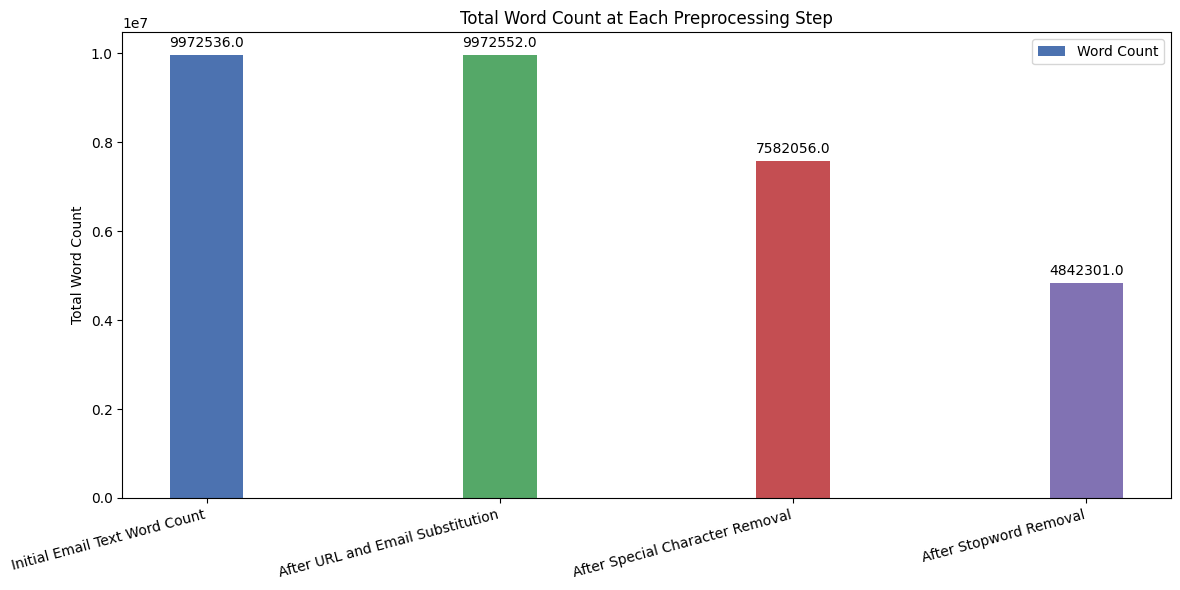

In [28]:
bar_width = 0.25 # Default bar width for the bar graph

# List of all columns that store the word counts after each preprocessing operation
cols = [
  'Initial Email Text Word Count',
  'After URL and Email Substitution',
  'After Special Character Removal',
  'After Stopword Removal'
]

# Store the sum of all word counts after each operation
values = [df[col].sum() for col in cols]

# A list of colors that will be used in the bar graph.
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']

# Define a plot figure with a size of 12 and 6
plt.figure(figsize=(12, 6))

# Define a new set of bars for the graph, with:
bars = plt.bar(
    range(len(cols)), # The X axis being the amount of times we recorded the word counts after each step
    values, # The previously saved sum of all word counts after each operation
    width=bar_width,
    tick_label=cols, # The Label of each bar, derived from the column names in the DataFrame
    color=colors,
    label='Word Count' # The label for values, displayed in the graph's legend
)

# For each generated bar from the previous function call, we iterate through all of them
for i, bar in enumerate(bars):
    height = bar.get_height() # Get the bar's height

    # Insert a new text label into the graph where:
    plt.text(
        bar.get_x() + bar.get_width() / 2, # the x-axis position of it is centered to a bar
        height + max(values) * 0.01,  # the y-axis position is set on top of the bar, offset by 0.01
        str(height), # The value of the label is set to sum of word count for each operation
        ha='center', # Horizontal alignment of the text is set to center
        va='bottom'  # The vertical alignment of the text is set to bottom
    )

plt.ylabel("Total Word Count") # The Y-Axis label of the graph is set to "Total Word Count"
plt.title("Total Word Count at Each Preprocessing Step") # The Title of the Graph is set to this
plt.xticks(rotation=15, ha='right') # The labels of each bar at the bottom is rotated by 15 degrees, and set its horizontal alignment to right
plt.legend() # Display a legend of values for the graph
plt.tight_layout() # Make use of the tight layout option for the figure
plt.show() # Display the generated graph